### Pizza Sales Analysis

In [80]:
#Importing the liberies for the analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings as wrn
wrn.filterwarnings("ignore")


In [81]:
#importing the csv files for the analysis

order_details_table = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv")
df1 = order_details_table

orders_table = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv")
df2 = orders_table

pizza_types_table = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding = "latin1")
df3 = pizza_types_table

pizzas_table = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv")
df4 = pizzas_table

In [82]:
# Joining the tables together into one table df.

df = df1.merge(df2, on = "order_id", how = "inner").merge(df4, on = "pizza_id", how = "inner").merge(df3, on = "pizza_type_id", how ="inner")

In [83]:
df  #Checking the table

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [84]:
df.info()   # checking the info of the table null values count and datatype for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [85]:
# Through the above information,it shows that date and time are not in the correct data type, so let change that to the correct data type!

df["date"] = pd.to_datetime(df["date"])

df["time"] = pd.to_datetime(df["time"], format = "%H:%M:%S")

In [86]:
df.info()  #This is to check if the columns are now in correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [87]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


#### Recommended Analysis

> ##### Total revenue/sales?

In [88]:
# let create a Total sales column by multiplying our quantity column with price column

df["total sales"] = df["quantity"] * df["price"]

In [89]:
# The sum of total sales table

total_revenue = df["total sales"].sum()


print(f"The Total Revenue obtain: ${total_revenue:,.2f}")

The Total Revenue obtain: $817,860.05


> ##### Total quantity sold?

In [90]:
total_quantity_sold = df["quantity"].sum()

print(f"The Total Quantity Sold: {total_quantity_sold:,.0f}")

The Total Quantity Sold: 49,574


> ##### Total orders?

In [91]:
total_orders = df["order_id"].nunique()


print(f"The Total Order: {total_orders:,.0f}")

The Total Order: 21,350


> ##### How many pizza types do they sell?

In [92]:
# To check for unique type of pizzas
df["name"].unique()


array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [93]:
# To count the unique type of pizzas

Pizza_type_counts = df["name"].nunique()

print(f"The Total Number of Pizza types: {Pizza_type_counts}")

The Total Number of Pizza types: 32


In [94]:
# To check for unique type of pizza including there sizes

df["pizza_id"].unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

In [95]:
# To count for unique type of pizza including there sizes

pizza_type_size_count = df["pizza_id"].nunique()

print(f"The Total Number of Pizza types with there sizes: {pizza_type_size_count}")

The Total Number of Pizza types with there sizes: 91


> ##### The average price of the pizzas?

In [96]:
# To find the general average price of pizzas

avg_price_of_pizza = df["price"].mean()

print(f"The General Average Price of Pizza: ${avg_price_of_pizza:.2f}") #The :.2f is used to format the output to 2-decimal place

The General Average Price of Pizza: $16.49


In [97]:
# finding the average price of pizzas according to the type of pizzas

avg_pizza_type = df.groupby(["name","pizza_type_id"])["price"].mean().reset_index(name = "Average Price")

avg_pizza_type

,name,pizza_type_id,Average Price
0,The Barbecue Chicken Pizza,bbq_ckn,17.572934
1,The Big Meat Pizza,big_meat,12.000000
2,The Brie Carre Pizza,brie_carre,23.650000
3,The Calabrese Pizza,calabrese,17.005124
4,The California Chicken Pizza,cali_ckn,17.448523
5,The Chicken Alfredo Pizza,ckn_alfredo,17.121429
6,The Chicken Pesto Pizza,ckn_pesto,17.153746
7,The Classic Deluxe Pizza,classic_dlx,15.575952
8,The Five Cheese Pizza,five_cheese,18.500000
9,The Four Cheese Pizza,four_cheese,16.951946


In [98]:
# sorting them according to there  Average prices

avg_pizza_type_sort = avg_pizza_type.sort_values(by = "Average Price", ascending = False)

avg_pizza_type_sort

,name,pizza_type_id,Average Price
2,The Brie Carre Pizza,brie_carre,23.650000
10,The Greek Pizza,the_greek,20.035633
8,The Five Cheese Pizza,five_cheese,18.500000
30,The Thai Chicken Pizza,thai_ckn,18.286069
26,The Spicy Italian Pizza,spicy_ital,18.104663
25,The Southwest Chicken Pizza,southw_ckn,18.080504
17,The Mexicana Pizza,mexicana,18.024038
14,The Italian Supreme Pizza,ital_supr,17.769740
19,The Pepper Salami Pizza,peppr_salami,17.637834
0,The Barbecue Chicken Pizza,bbq_ckn,17.572934


> ##### The peak hours of sales?

In [99]:
# To find the peak hours of sales , we have to create a column of hours from the time column

df["hours"] = df["time"].dt.hour


In [100]:
# Let group the hours table with total sales table to check the hours that has the highest sales
sales_by_hour = df.groupby("hours")["total sales"].sum().reset_index(name = "sales")
sales_by_hour

,hours,sales
0,9,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


In [101]:
#let sort the table in decending order of sales to see the peak hours of sale

sort_sales_by_hour = sales_by_hour.sort_values(by = "sales", ascending = False)
sort_sales_by_hour

,hours,sales
3,12,111877.90
4,13,106065.70
9,18,89296.85
8,17,86237.45
10,19,72628.90
7,16,70055.40
5,14,59201.40
11,20,58215.40
6,15,52992.30
2,11,44935.80


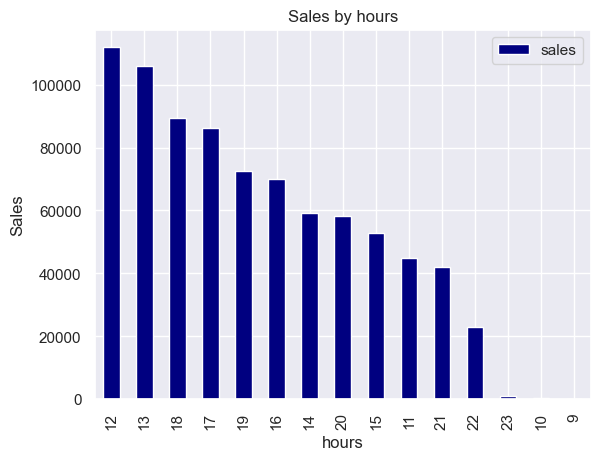

In [102]:
#Visualization of the result to get a clearer view of the peak sales hour

sort_sales_by_hour.plot(x = 'hours', y ="sales" ,kind = 'bar', color = "navy")

plt.ylabel("Sales")
plt.title("Sales by hours")
plt.xlabel("hours")

plt.show()

> ##### Total sales made on each day of the week. Which day of the week is when sales are made the most?

In [103]:
df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total sales,hours
44938,44939,19754,mexicana_s,1,2015-12-02,1900-01-01 13:14:27,mexicana,S,12.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",12.00,13
19381,19382,8522,ckn_alfredo_l,1,2015-05-23,1900-01-01 13:25:32,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",20.75,13
38852,38853,17124,five_cheese_l,1,2015-10-17,1900-01-01 15:54:47,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,15


In [104]:
# firstly we have to add a day and day_name columns through the date column

df["day"] = df["date"].dt.day
df["day_name"] = df["date"].dt.day_name()

In [105]:
# Let group the total sales by day_name to get the Total sales of each day in a week.

sales_by_days = df.groupby(["day_name"])["total sales"].sum().reset_index(name = "Total Sales")

sales_by_days

,day_name,Total Sales
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


In [106]:
# let sort the weeks by the Total sales
sales_by_days_sort = sales_by_days.sort_values(by = "Total Sales", ascending = False)

sales_by_days_sort

,day_name,Total Sales
0,Friday,136073.90
4,Thursday,123528.50
2,Saturday,123182.40
6,Wednesday,114408.40
5,Tuesday,114133.80
1,Monday,107329.55
3,Sunday,99203.50


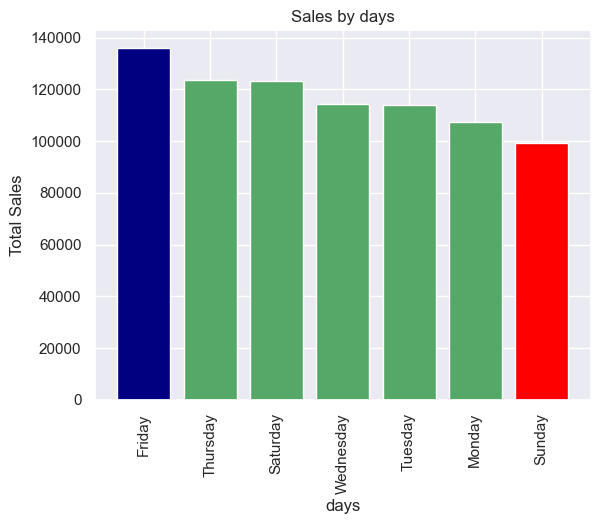

In [107]:
#Visualization of the result to get a clearer view of the sales by days
colors = ["navy" if x == sales_by_days_sort["Total Sales"].max() else "red" if x == sales_by_days_sort["Total Sales"].min() else "g" for x in sales_by_days_sort["Total Sales"]]

plt.bar(sales_by_days_sort["day_name"],sales_by_days_sort["Total Sales"], color = colors)
plt.xticks(rotation = 90)
plt.ylabel("Total Sales")
plt.title("Sales by days")
plt.xlabel("days")


plt.show()

In [108]:
# Let put that into statement by using iloc to locate the day with the highest Total sales from the sales_by_days_sort table.

day = sales_by_days_sort.iloc[0,0]
amount = sales_by_days_sort.iloc[0,1]

print(f"The day of the week with the highest sales is {day} with a total of ${amount:,.2f}")

The day of the week with the highest sales is Friday with a total of $136,073.90


> #####  8.	Find the top 5 bestselling pizzas.

In [109]:
# let group total sales by pizza_type_id to get the total sales gotten from each pizzas type without there sizes in consideration

pizza_by_sales = df.groupby(["pizza_type_id","name"])["total sales"].sum().reset_index(name = "Total sales")

pizza_by_sales= pizza_by_sales.sort_values(by = "Total sales", ascending = False) # this has been sorted by the Total sales


pizza_by_sales.head()

,pizza_type_id,name,Total sales
29,thai_ckn,The Thai Chicken Pizza,43434.25
0,bbq_ckn,The Barbecue Chicken Pizza,42768.00
4,cali_ckn,The California Chicken Pizza,41409.50
7,classic_dlx,The Classic Deluxe Pizza,38180.50
25,spicy_ital,The Spicy Italian Pizza,34831.25


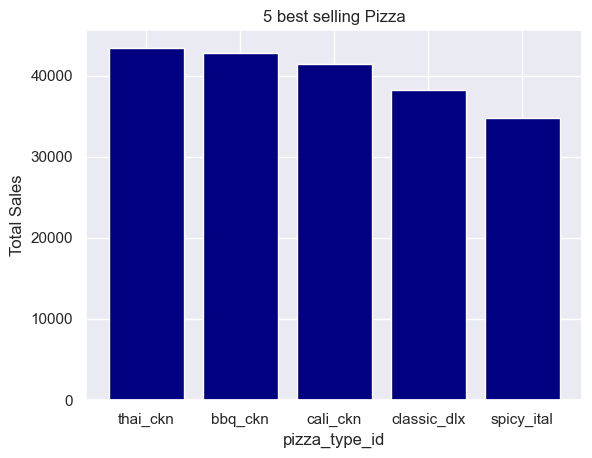

In [110]:
#Visualization of the result to get a clearer view of the 5 best selling Pizza with there total sales

plt.bar(pizza_by_sales.head()["pizza_type_id"],pizza_by_sales.head()["Total sales"], color = "navy")
plt.ylabel("Total Sales")
plt.title("5 best selling Pizza")
plt.xlabel("pizza_type_id")


plt.show()

In [111]:
# let group total sales by pizza_type_id to get the total sales gotten from each pizzas type with there sizes in consideration

pizza_by_sales = df.groupby("pizza_id")["total sales"].sum().reset_index(name = "Total sales")

pizza_by_sales_sort= pizza_by_sales.sort_values(by = "Total sales", ascending = False) # this has been sorted by the Total sales


pizza_by_sales_sort.head()


,pizza_id,Total sales
80,thai_ckn_l,29257.50
20,five_cheese_l,26066.50
21,four_cheese_l,23622.20
68,spicy_ital_l,23011.75
3,big_meat_s,22968.00


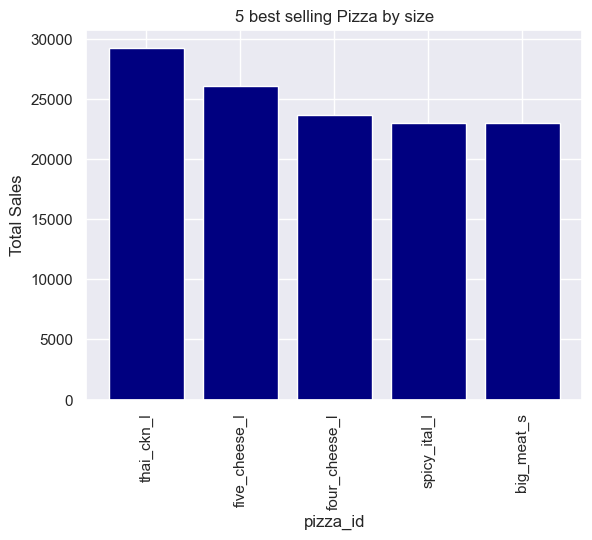

In [112]:
#Visualization of the result to get a clearer view of the 5 best selling Pizza by sizes with there total sales

plt.bar(pizza_by_sales_sort.head()["pizza_id"],pizza_by_sales_sort.head()["Total sales"], color = "navy")
plt.xticks(rotation = 90)
plt.ylabel("Total Sales")
plt.title("5 best selling Pizza by size")
plt.xlabel("pizza_id")


plt.show()

> #####  9.	Find the sales made in each month. Any trend noticeable?

In [113]:
# adding the months,month_name and year column to the table.

df["months"] = df["date"].dt.month
df["month name"] = df["date"].dt.month_name()
df["year"] = df["date"].dt.year

In [114]:
df.sample(3)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total sales,hours,day,day_name,months,month name,year
37487,37488,16551,hawaiian_l,1,2015-10-06,1900-01-01 22:04:03,hawaiian,L,16.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",16.50,22,6,Tuesday,10,October,2015
39964,39965,17589,thai_ckn_m,1,2015-10-27,1900-01-01 16:24:14,thai_ckn,M,16.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",16.75,16,27,Tuesday,10,October,2015
27262,27263,11999,soppressata_s,1,2015-07-19,1900-01-01 21:42:54,soppressata,S,12.50,The Soppressata Pizza,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",12.50,21,19,Sunday,7,July,2015


In [115]:
Sales_by_months = df.groupby("month name", observed= True)["total sales"].sum().reset_index(name = "Total Sales")  #Observe is used here to remove the FutureWarning action from pandas

# Creating a list to show how i want the months to be ordered.
month_orders  = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

df["month name"] = pd.Categorical(df["month name"], categories = month_orders, ordered = True)

Sales_by_months

,month name,Total Sales
0,April,68736.80
1,August,68278.25
2,December,64701.15
3,February,65159.60
4,January,69793.30
5,July,72557.90
6,June,68230.20
7,March,70397.10
8,May,71402.75
9,November,70395.35


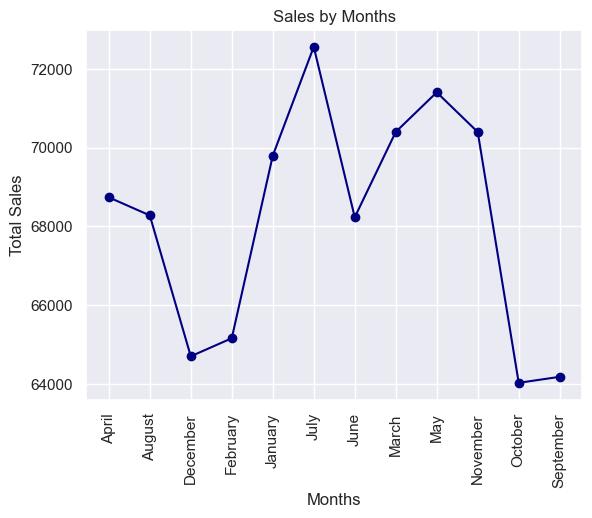

'\nThe monthly sales trend shows a recurring alternating pattern of highs and lows across the year in 2015. Sales increase in January,drop in February,\nrise again in March, and dip in April.This alternating cycle continues until July, which records the highest sales peak.\nAfter July, sales decline steadily through August, September, and October. However, there is a recovery in\nNovember before dipping again in December.This suggests a cyclical demand pattern with alternating monthly fluctuations, combined with a \nmid-year peak (July) and an end-of-year recovery (November) before another decline.”This alternating cycle and mid-year peak could indicate seasonality,\npromotional effects, or customer spending patterns.\nThe November rebound may reflect holiday influence or end-of-year activities.\n'

In [116]:
plt.plot(Sales_by_months["month name"],Sales_by_months["Total Sales"], color = "navy", marker = "o")
plt.xticks(rotation = 90)
plt.ylabel("Total Sales")
plt.title("Sales by Months")
plt.xlabel("Months")

plt.show()

"""
The monthly sales trend shows a recurring alternating pattern of highs and lows across the year in 2015. Sales increase in January,drop in February,
rise again in March, and dip in April.This alternating cycle continues until July, which records the highest sales peak.
After July, sales decline steadily through August, September, and October. However, there is a recovery in
November before dipping again in December.This suggests a cyclical demand pattern with alternating monthly fluctuations, combined with a 
mid-year peak (July) and an end-of-year recovery (November) before another decline.”This alternating cycle and mid-year peak could indicate seasonality,
promotional effects, or customer spending patterns.
The November rebound may reflect holiday influence or end-of-year activities.
"""

In [117]:
df.head(4)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total sales,hours,day,day_name,months,month name,year
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,1,Thursday,1,January,2015
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,1,Thursday,1,January,2015
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,1,Thursday,1,January,2015
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,1,Thursday,1,January,2015


In [118]:
#Let check the last 5 pizza type that are not doing well?

pizza_by_sales = df.groupby("pizza_type_id")["total sales"].sum().reset_index(name = "Total sales")
pizza_by_sales= pizza_by_sales.sort_values(by = "Total sales", ascending = False)


five_least_selling_pizza =pizza_by_sales.tail()
five_least_selling_pizza

,pizza_type_id,Total sales
26,spin_pesto,15596.00
15,mediterraneo,15360.50
28,spinach_supr,15277.75
10,green_garden,13955.75
2,brie_carre,11588.50


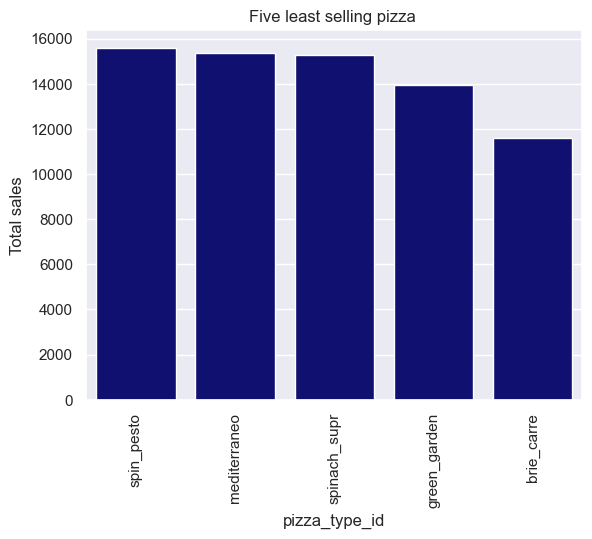

In [119]:
sns.barplot(data = five_least_selling_pizza, x = "pizza_type_id", y = "Total sales", color = "navy")
plt.xticks(rotation = 90)
plt.title("Five least selling pizza ")


plt.show()

In [120]:
#Let check the last 5 pizza type according to sizes that are not doing well?

pizzatype_by_sales = df.groupby("pizza_id")["total sales"].sum().reset_index(name = "Total sales")
pizzatype_by_sales = pizzatype_by_sales.sort_values(by = "Total sales", ascending = False)


five_least_sales_size = pizzatype_by_sales.tail()

five_least_sales_size

,pizza_id,Total sales
43,mexicana_s,1944.00
23,green_garden_l,1923.75
13,ckn_alfredo_s,1224.00
7,calabrese_s,1212.75
87,the_greek_xxl,1006.60


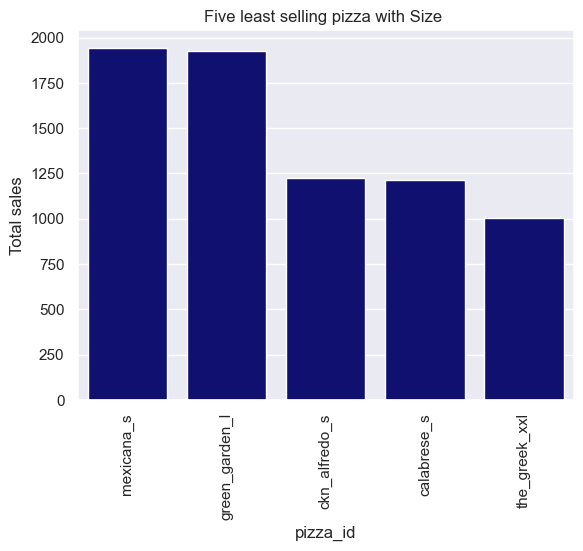

In [121]:
sns.barplot(data = five_least_sales_size, x = "pizza_id", y = "Total sales", color = "navy")
plt.xticks(rotation = 90)
plt.title("Five least selling pizza with Size ")

plt.show()

##### 11 Top 10 ingridient used in 2015

In [122]:
#splitting the ingridient column so as to count each time each ingridient was used.

all_ingrident = df["ingredients"].str.split(",").explode().str.strip()
all_ingrident

0               Sliced Ham
0                Pineapple
0        Mozzarella Cheese
1                Pepperoni
1                Mushrooms
               ...        
48619          Red Peppers
48619        Green Peppers
48619             Tomatoes
48619           Red Onions
48619       Barbecue Sauce
Name: ingredients, Length: 267576, dtype: object

In [123]:
# count of each ingridient
ingrident_count = all_ingrident.value_counts().head(10)
ingrident_count

ingredients
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: count, dtype: int64

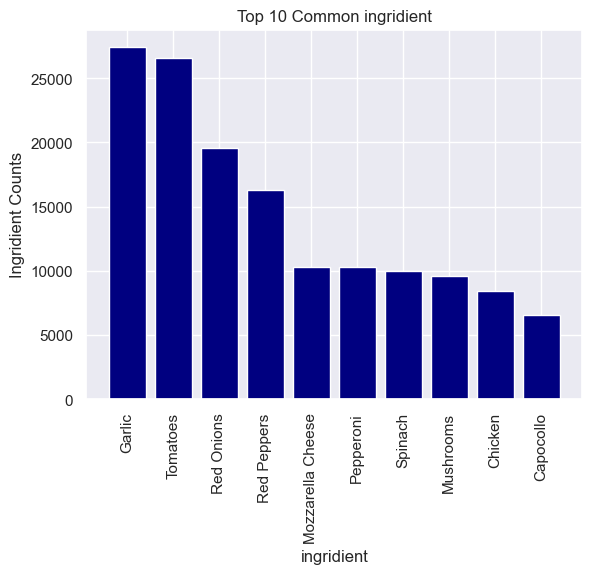

In [124]:
# A plot of ingridient with count.

plt.bar(ingrident_count.index,ingrident_count.values, color = "navy")
plt.xticks( rotation = 90)
plt.ylabel("Ingridient Counts")
plt.title("Top 10 Common ingridient")
plt.xlabel("ingridient")

plt.show()

##### Category by Sales

In [125]:
# Counting category

df["category"].value_counts()

category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [126]:
#grouping category by the total sales to know the total amount made from each categories and sorting them.

category_by_sales = df.groupby("category")["total sales"].sum().reset_index(name = "Total_sales")

category_by_sales_sort = category_by_sales.sort_values(by = "Total_sales", ascending = False)
category_by_sales_sort

,category,Total_sales
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [127]:
category_only = category_by_sales_sort["category"]
category_only.values

array(['Classic', 'Supreme', 'Chicken', 'Veggie'], dtype=object)

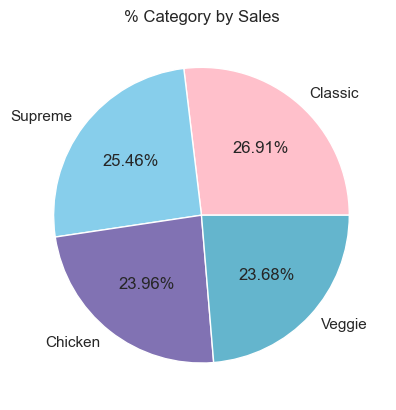

In [128]:
#Visualizing with pie chart to know the total percentage of each category

plt.pie(category_by_sales_sort["Total_sales"], 
        labels = category_only.values, 
        autopct = "%1.2f%%", 
        colors = ["pink","skyblue","m","c"]
       )
        #textprops= {"color": "white", "fontsize": 12, "weight": "bold"})
#plt.legend(category_by_sales.index)
plt.title("% Category by Sales")


plt.show()

In [129]:
df.head(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total sales,hours,day,day_name,months,month name,year
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,1,Thursday,1,January,2015
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,1,Thursday,1,January,2015


In [130]:
# This shows the average price of each category

category_by_price = df.groupby("category")["price"].mean()
category_by_price.sort_values(ascending = False)

category
Chicken    17.709408
Supreme    17.363229
Veggie     16.612639
Classic    14.797490
Name: price, dtype: float64

In [131]:
# This shows the total quantity orderd of each category

category_by_quantity = df.groupby("category")["quantity"].sum()
category_by_quantity.sort_values(ascending = False)

category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

- The total sales of classic is the highest due to its low average price, and this makes the demand of classic caategory to be high.

#####  Pizza Sizes by sales

In [132]:
size_count = df["size"].value_counts()
size_count

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [133]:
size_by_sales = df.groupby("size")["total sales"].sum().reset_index()
size_by_sales

,size,total sales
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


In [134]:
size_by_quantity = df.groupby("size")["quantity"].sum()
size_by_quantity

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

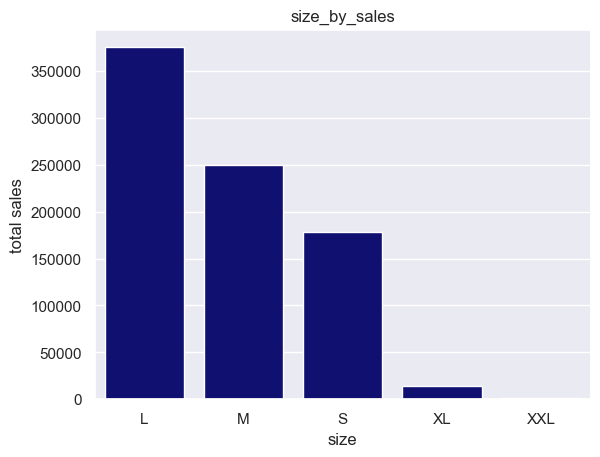

In [135]:
sns.barplot(data = size_by_sales, x = "size", y = "total sales", color = "navy")

plt.title("size_by_sales")

plt.show()

In [136]:
size_by_price = df.groupby("size")["price"].mean()
size_by_price

size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: price, dtype: float64

- Large pizzas have highest sales due to high quantity demand irrespective of its high price. and this shows customers are more convinient in getting large pizzas compared to the other sizes ok pizzas